In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import glob
import os
from astropy.io import fits
import numpy as np
import multiprocessing

import stack

np.seterr(divide='ignore', invalid='ignore')

dir_drp = '/Users/astro/Documents/notebooks/manga/spectro/redux/v2_5_3/'
dir_dap = '/Users/astro/Documents/notebooks/manga/spectro/analysis/MPL-8/HYB10-MILESHC-MILESHC/'
dir_res = '/Users/astro/Documents/notebooks/zs/pair-m-z/stack_11_16_1_1p5re/'
file_drp='/Users/astro/Documents/notebooks/manga/spectro/analysis/MPL-8/drpall-v2_5_3.fits'

def stacking(plateifu):
    print(plateifu)
    with fits.open(file_drp) as f_drp:
        plateifu_drp=f_drp[1].data.field('plateifu')
        z=f_drp[1].data.field('z')
        index_ifu=np.where(plateifu_drp==plateifu)[0]
        z_ifu=z[index_ifu]
#         print(z_ifu)
        plate = plateifu.split('-')[0]
        ifu = plateifu.split('-')[1]
        f_map = dir_dap+plate+'/'+ifu+'/manga-'+plate + \
            '-'+ifu+'-MAPS-HYB10-MILESHC-MILESHC.fits.gz'
        f_cube = dir_drp+plate+'/stack/manga-'+plate + \
            '-'+ifu+'-LOGCUBE.fits.gz'
        if os.path.exists(f_map) and os.path.exists(f_cube):
            cube = fits.open(f_cube)
            wave = cube['WAVE'].data
            flux_t = np.transpose(cube['FLUX'].data, axes=(1, 2, 0))
            ivar_t = np.transpose(cube['IVAR'].data, axes=(1, 2, 0))
            flux_header=cube['FLUX'].header

            mapf = fits.open(f_map)
            flux_map = mapf['EMLINE_GFLUX'].data
            ivar_map = mapf['EMLINE_GFLUX_IVAR'].data
            mask_map = mapf['EMLINE_GFLUX_MASK'].data
            ellcoo = mapf['SPX_ELLCOO'].data[1]
            stellar_vel = mapf['STELLAR_VEL'].data


            stack.stack(plateifu, flux_header,wave, flux_t, ivar_t, flux_map, ivar_map,
                              mask_map, ellcoo, stellar_vel,dir_res,z_ifu)



if __name__ == '__main__':
    dir_drpall = '/Users/astro/Documents/notebooks/manga/spectro/analysis/MPL-8/drpall-v2_5_3.fits'
    f = fits.open(dir_drpall)
    data = f[1].data
    plateifu = data.field('plateifu')

    print('              start                  :')
    pool=multiprocessing.Pool(processes=4)
    pool.map(stacking,plateifu)
    pool.close()
    pool.join()
    print('              finished               .')
    

              start                  :
10001-12701
10503-9102
7977-6104
8141-12701
7977-9101
10504-12701
10001-12702
8141-12702
7977-9102
10504-12702
10001-12703
8141-12703
7979-12701
10504-12703
10001-12704
8141-12704
7979-12702
10504-12704
10001-12705
8141-12705
7979-12703
10504-12705
10001-1901
8141-1901
7979-12704
10001-1902
8141-1902
10001-3701
8141-3701
10504-1901
10001-3702
8141-3702
10504-1902
7979-12705
10001-3703
10504-3701
8141-3703
10001-3704
10504-3702
8141-3704
10001-6101
10504-3703
8141-6101
7979-1901
7979-1902
10504-3704
10001-6102
8141-6102
7979-3701
10504-6101
7979-3702
10001-6103
8141-6103
10504-6102
7979-3703
10001-6104
8141-6104
7979-3704
10504-6103
10001-9101
7979-6101
8141-9101
10504-6104
7979-6102
10001-9102
10504-9101
8141-9102
7979-6103
10141-12701
10141-12702
10141-12703
10141-12704
10141-12705
10141-1901
10141-1902
10504-9102
10141-3701
10141-3702
10141-3703
10141-3704
10141-6101
8143-12701
10141-6102
10141-6103
10141-6104
10141-9101
10141-9102
10142-12701
1

10221-12704
8152-12705
10516-1901
10516-1902
8081-12705
10221-12705
8152-1901
10516-3701
8152-1902
10516-3702
8152-3701
10516-3703
8081-1901
8152-3702
10221-1901
8081-1902
10516-3704
10221-1902
8152-3703
8081-3701
10221-3701
10516-6101
8152-3704
8081-3702
10221-3702
10516-6102
8152-6101
8081-3703
10221-3703
8081-3704
8152-6102
10516-6103
10221-3704
8081-6101
10221-6101
8152-6103
10516-6104
8081-6102
10221-6102
8152-6104
10516-9101
8081-6103
10221-6103
8152-9101
10516-9102
8081-6104
10221-6104
8152-9102
8081-9101
10517-12701
10221-9101
8153-12701
8081-9102
10221-9102
10517-12702
8082-12701
8153-12702
10492-12701
10517-12703
8082-12702
8153-12703
10492-12702
10517-12704
8082-12703
8153-12704
10492-12703
10517-12705
8153-12705
8082-12704
10492-12704
10517-1901
8153-1901
8082-12705
10517-1902
10492-12705
8153-1902
10517-3701
8153-3701
8082-1901
10517-3702
8153-3702
8082-1902
10492-1901
10517-3703
8153-3703
8082-3701
10492-1902
10517-3704
8153-3704
8082-3702
10492-3701
10517-6101
8153-6101


8135-6102
8247-3702
8255-1902
7968-12705
8247-3703
8255-3701
8135-6103
8247-3704
8255-3702
8247-6101
8135-6104
7968-1901
8255-3703
7968-1902
8247-6102
8135-9101
8255-3704
7968-3701
8247-6103
8255-6101
8135-9102
7968-3702
8247-6104
8255-6102
7968-3703
8247-9101
8137-12701
8255-6103
7968-3704
7968-6101
8247-9102
8255-6104
8137-12702
7968-6102
8255-9101
8248-12701
7968-6103
8255-9102
8137-12703
8248-12702
7968-6104
8256-12701
7968-9101
8137-12704
8248-12703
8256-12702
7968-9102
8137-12705
8248-12704
7972-12701
8256-12703
8137-1901
8248-12705
8137-1902
8256-12704
7972-12702
8137-3701
8248-1901
8137-3702
8256-12705
8248-1902
7972-12703
8248-3701
8137-3703
8137-3704
8248-3702
8256-1901
7972-12704
8137-6101
8256-1902
8248-3703
8256-3701
8248-3704
8137-6102
8256-3702
7972-12705
8248-6101
8256-3703
8137-6103
8248-6102
8256-3704
8137-6104
8256-6101
8248-6103
7972-1901
8137-9101
8256-6102
7972-1902
8248-6104
7972-3701
8256-6103
8137-9102
8248-9101
7972-3702
8256-6104
7972-3703
8248-9102
8138-1270

8312-12704
8567-12703
8458-12704
8333-9102
8312-12705
8567-12704
8334-12701
8458-12705
8312-1901
8312-1902
8567-12705
8334-12702
8312-3701
8458-1901
8458-1902
8312-3702
8458-3701
8567-1901
8312-3703
8334-12703
8458-3702
8567-1902
8312-3704
8567-3701
8458-3703
8312-6101
8312-6102
8458-3704
8567-3702
8334-12704
8458-6101
8312-6103
8567-3703
8458-6102
8567-3704
8312-6104
8334-12705
8567-6101
8458-6103
8312-9101
8458-6104
8334-1901
8567-6102
8334-1902
8312-9102
8458-9101
8334-3701
8567-6103
8313-12701
8334-3702
8567-6104
8458-9102
8334-3703
8567-9101
8334-3704
8459-12701
8313-12702
8334-6101
8567-9102
8334-6102
8459-12702
8313-12703
8568-12701
8334-6103
8459-12703
8313-12704
8334-6104
8568-12702
8334-9101
8459-12704
8313-12705
8568-12703
8334-9102
8459-12705
8335-12701
8313-1901
8568-12704
8568-12705
8313-1902
8313-3701
8335-12702
8313-3702
8459-1901
8568-1901
8313-3703
8459-1902
8313-3704
8459-3701
8568-1902
8335-12703
8459-3702
8313-6101
8568-3701
8459-3703
8568-3702
8313-6102
8335-12704

8615-3702
8485-3701
8615-3703
8443-9101
8485-3702
8603-1901
8615-3704
8603-1902
8485-3703
8615-6101
8603-3701
8443-9102
8485-3704
8603-3702
8615-6102
8485-6101
8444-12701
8603-3703
8615-6103
8603-3704
8485-6102
8615-6104
8603-6101
8485-6103
8444-12702
8615-9101
8485-6104
8603-6102
8615-9102
8603-6103
8485-9101
8444-12703
8616-12701
8603-6104
8485-9102
8603-9101
8444-12704
8616-12702
8486-12701
8603-9102
8444-12705
8616-12703
8486-12702
8604-12701
8444-1901
8616-12704
8444-1902
8604-12702
8486-12703
8444-3701
8444-3702
8616-12705
8616-1901
8444-3703
8486-12704
8616-1902
8604-12703
8616-3701
8444-3704
8486-12705
8616-3702
8444-6101
8604-12704
8616-3703
8444-6102
8616-3704
8616-6101
8486-1901
8444-6103
8604-12705
8486-1902
8616-6102
8486-3701
8444-6104
8616-6103
8604-1901
8604-1902
8444-9101
8604-3701
8616-6104
8486-3702
8604-3702
8486-3703
8444-9102
8616-9101
8604-3703
8486-3704
8604-3704
8445-12701
8486-6101
8616-9102
8604-6101
8486-6102
8618-12701
8445-12702
8486-6103
8604-6102
8486-61

9024-6101
8979-3704
8932-9102
9024-6102
8711-12705
8979-6101
9024-6103
8933-12701
8979-6102
8711-1901
9024-6104
8711-1902
8933-12702
8979-6103
9024-9101
8711-3701
8979-6104
8711-3702
9024-9102
8933-12703
8711-3703
8979-9101
9025-12701
8711-3704
8933-12704
8979-9102
8711-6101
9025-12702
9025-12703
8711-6102
8980-12701
8933-12705
8711-6103
9025-12704
8980-12702
8711-6104
8933-1901
8933-1902
8711-9101
9025-12705
8933-3701
8980-12703
8933-3702
8711-9102
8933-3703
9025-1901
8980-12704
8933-3704
8712-12701
9025-1902
9025-3701
8933-6101
9025-3702
8980-12705
8933-6102
8712-12702
9025-3703
8933-6103
9025-3704
8933-6104
9025-6101
8980-1901
8712-12703
8933-9101
8980-1902
9025-6102
8980-3701
8712-12704
9025-6103
8980-3702
8933-9102
8980-3703
9025-6104
8712-12705
8980-3704
8934-12701
9025-9101
8980-6101
9025-9102
8712-1901
8980-6102
8934-12702
8712-1902
8980-6103
9026-12701
8712-3701
8934-12703
8980-6104
8712-3702
8980-9101
9026-12702
8712-3703
8934-12704
8712-3704
8980-9102
8712-6101
9026-12703
89

8722-9101
8944-6103
9036-3704
8991-12702
8722-9102
9036-6101
8944-6104
9036-6102
8991-12703
8944-9101
8723-12701
9036-6103
8944-9102
9036-6104
8991-12704
8723-12702
9036-9101
8945-12701
8991-12705
8723-12703
9036-9102
8945-12702
8991-1901
9037-12701
8723-12704
8991-1902
8945-12703
8991-3701
9037-12702
8723-12705
8991-3702
8991-3703
8945-12704
9037-12703
8991-3704
8723-1901
8991-6101
8723-1902
8945-12705
8723-3701
9037-12704
8991-6102
8723-3702
8945-1901
8723-3703
8991-6103
8945-1902
9037-12705
8723-3704
8945-3701
8991-6104
9044-3702
8945-3702
9044-3703
8991-9101
9037-1901
8945-3703
9037-1902
9044-3704
9037-3701
9044-6101
8991-9102
8945-3704
9037-3702
8945-6101
9044-6102
9037-3703
8992-12701
8945-6102
9037-3704
9044-6103
9037-6101
9044-6104
8945-6103
8992-12702
9044-9101
9037-6102
8945-6104
9037-6103
8992-12703
8945-9101
9044-9102
9037-6104
9045-12701
8945-9102
8992-12704
9037-9101
9045-12702
9037-9102
8946-12701
8992-12705
9038-12701
9045-12703
8946-12702
8992-1901
8992-1902
9038-12702

9507-12704
9089-12704
9196-12702
9874-12703
9507-12705
9089-12705
9196-12703
9874-12704
9507-1901
9507-1902
9089-1901
9507-3701
9089-1902
9196-12704
9874-12705
9089-3701
9507-3702
9507-3703
9089-3702
9196-12705
9507-3704
9874-1901
9089-3703
9507-6101
9874-1902
9089-3704
9874-3701
9196-1901
9507-6102
9196-1902
9089-6101
9874-3702
9196-3701
9874-3703
9507-6103
9089-6102
9196-3702
9874-3704
9507-6104
9196-3703
9089-6103
9196-3704
9874-6101
9507-9101
9089-6104
9196-6101
9874-6102
9507-9102
9089-9101
9196-6102
9874-6103
9089-9102
9508-12701
9196-6103
9874-6104
9196-6104
9874-9101
9874-9102
9090-12701
9508-12702
9196-9101
9875-12701
9090-12702
9508-12703
9196-9102
9875-12702
9090-12703
9485-12701
9508-12704
9875-12703
9090-12704
9485-12702
9508-12705
9875-12704
9090-12705
9485-12703
9508-1901
9508-1902
9875-12705
9508-3701
9090-1901
9508-3702
9485-12704
9090-1902
9875-1901
9508-3703
9090-3701
9875-1902
9508-3704
9875-3701
9090-3702
9485-12705
9875-3702
9508-6101
9090-3703
9875-3703
9090-3704

9186-1901
9862-9102
9885-12705
9186-1902
9494-9102
9186-3701
9863-12701
9186-3702
9495-12701
9885-1901
9186-3703
9885-1902
9186-3704
9885-3701
9863-12702
9186-6101
9495-12702
9885-3702
9885-3703
9186-6102
9863-12703
9885-3704
9495-12703
9885-6101
9186-6103
9885-6102
9863-12704
9495-12704
9186-6104
9885-6103
9186-9101
9863-12705
9885-6104
9495-12705
9186-9102
9885-9101
9863-1901
9863-1902
9188-12701
9495-1901
9885-9102
9863-3701
9495-1902
9863-3702
9495-3701
9886-12701
9188-12702
9863-3703
9495-3702
9863-3704
9495-3703
9863-6101
9886-12702
9188-12703
9495-3704
9863-6102
9495-6101
9886-12703
9863-6103
9188-12704
9495-6102
9863-6104
9886-12704
9495-6103
9863-9101
9188-12705
9495-6104
9863-9102
9886-12705
9495-9101
9188-1901
9188-1902
9864-12701
9188-3701
9886-1901
9495-9102
9188-3702
9886-1902
9886-3701
9188-3703
9864-12702
9886-3702
9496-12701
9188-3704
9886-3703
9188-6101
9886-3704
9864-12703
9496-12702
9188-6102
9886-6101
9188-6103
9886-6102
9864-12704
9496-12703
9886-6103
9188-6104
98

In [97]:
a=np.array([-0.5453526973724365, -0.5397058129310608, -0.5511478781700134,-0.6038869023323059, -0.5872294902801514, -0.6009038686752319])
b=np.array([0.1288808137178421, 0.1780097633600235, 0.20957136154174805,0.2638080418109894, 0.20070762932300568, 0.22937193512916565])
mask=(b<=0.61/(a-0.05)+1.3)&(a<0.05)&(b<=0.61/(a-0.49)+1.19)
mask

array([ True,  True,  True,  True,  True,  True])

In [85]:
a=np.array([1,2,3,4,5,6])
mask=(a>3)
mask


array([False, False, False,  True,  True,  True])

(396,) (396,)


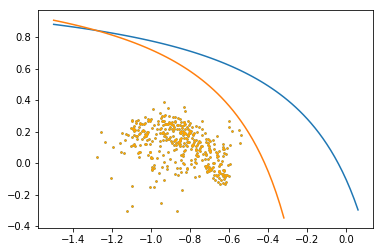

In [94]:
dir_res = '/Users/astro/Documents/notebooks/zs/pair-m-z/stack_11_16_0_1re/'
with fits.open(dir_res+'s_x_y.fits') as f:
    data=f[1].data
    x=data['x']
    y=data['y']
    
    x_bpt = np.arange(-1.5, 0.07, 0.02)
    y_bpt = 0.61/(x_bpt-0.47)+1.19
    x_bpt1 = np.arange(-1.5, -0.3, 0.02)
    y_bpt1 = 0.61/(x_bpt1-0.05)+1.3
    
    mask=(y<0.61/(x-0.05)+1.3)&(x<0.05)&(y<(0.61/(x-0.47)+1.19))
    mask_1=(1-mask).astype(np.bool)
    print(x.shape,y.shape)
    plt.figure()
    plt.plot(x_bpt,y_bpt)
    plt.plot(x_bpt1,y_bpt1)
    plt.scatter(x,y,s=2)
    plt.scatter(x[mask],y[mask],s=2,color='orange')

    plt.show()

In [91]:
x=np.array([-0.5453527])
y=np.array([0.12888081])


mask=(y<0.61/(x-0.05)+1.13)&(x<0.05)&(y<(0.61/(x-0.47)+1.19))
mask

array([False])

In [92]:
0.61/(-0.5453527-0.05)+1.13

0.10539727291066292

In [57]:
b=np.array([[2,3,4],[5,6,7],[8,9,10]])

In [60]:
a_1=np.ma.array(a,mask=(a<6))

In [61]:
b_1=np.ma.array(b,mask=(b<6))

In [62]:
a_1/b_1

masked_array(
  data=[[--, --, --],
        [--, --, 0.8571428571428571],
        [0.875, 0.8888888888888888, 0.9]],
  mask=[[ True,  True,  True],
        [ True,  True, False],
        [False, False, False]],
  fill_value=1e+20)

In [63]:
a_1

masked_array(
  data=[[--, --, --],
        [--, --, 6],
        [7, 8, 9]],
  mask=[[ True,  True,  True],
        [ True,  True, False],
        [False, False, False]],
  fill_value=999999)

In [65]:
b_1

masked_array(
  data=[[--, --, --],
        [--, 6, 7],
        [8, 9, 10]],
  mask=[[ True,  True,  True],
        [ True, False, False],
        [False, False, False]],
  fill_value=999999)